In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve





In [4]:
# Full path to the CSV file
file_path = "/Users/shivangirai/Downloads/Loan Data.csv"

# Load the file into a DataFrame
df = pd.read_csv(file_path)





In [5]:
df.shape

(1225, 1)

In [6]:
df.head(10)

,YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD
0,19.0;4.0;.0;1;.00;R;.00;O;14464.00;4.00;.00;.0...
1,41.0;2.0;.0;1;.00;P;36000.00;O;.00;.00;280.00;...
2,66.0;.0;.0;1;.00;N;30000.00;N;.00;.00;.00;.00;...
3,51.0;2.0;.0;1;.00;P;464.00;O;24928.00;8464.00;...
4,65.0;.0;.0;1;.00;P;15000.00;P;.00;.00;.00;.00;...
5,42.0;2.0;.0;1;10500.00;E;48000.00;O;43392.00;4...
6,59.0;.0;.0;1;6500.00;B;30000.00;O;62464.00;560...
7,43.0;1.0;.0;1;13500.00;E;9000.00;O;63392.00;54...
8,52.0;.0;.0;1;.00;E;22500.00;P;.00;.00;.00;200....
9,65.0;.0;.0;1;.00;P;19500.00;O;26464.00;4464.00...


In [7]:
df.shape

(1225, 1)

In [10]:


# Read the CSV file with semicolon (;) as the delimiter
df = pd.read_csv(file_path, delimiter=";")

# Display the first few rows
print(df.head(5))


    YOB  NKID  DEP  PHON  SINC AES    DAINC RES    DHVAL   DMORT  DOUTM  \
0  19.0   4.0  0.0     1   0.0   R      0.0   O  14464.0     4.0    0.0   
1  41.0   2.0  0.0     1   0.0   P  36000.0   O      0.0     0.0  280.0   
2  66.0   0.0  0.0     1   0.0   N  30000.0   N      0.0     0.0    0.0   
3  51.0   2.0  0.0     1   0.0   P    464.0   O  24928.0  8464.0  584.0   
4  65.0   0.0  0.0     1   0.0   P  15000.0   P      0.0     0.0    0.0   

   DOUTL  DOUTHP  DOUTCC  BAD  
0    0.0     0.0     0.0  0.0  
1  664.0     0.0    80.0  0.0  
2    0.0     0.0     0.0  0.0  
3  320.0     0.0    60.0  0.0  
4    0.0     0.0     0.0  0.0  


In [11]:
df.shape

(1225, 15)

In [ ]:
# the delimiter was ; instead of , whuch had to be identified 

In [12]:
# Column Descriptions for Loan Dataset
column_descriptions = {
    "YOB": "Year of birth of the applicant.",
    "NKID": "Number of kids in the applicant's household.",
    "DEP": "Dependency indicator (likely number of dependents).",
    "PHON": "Indicates whether the applicant has a phone (binary: 1 for yes, 0 for no).",
    "SINC": "Annual salary/income of the applicant.",
    "AES": "Employment status of the applicant, possibly encoded.",
    "DAINC": "Debt-to-income ratio or a derived income metric.",
    "RES": "Residence type or housing status.",
    "DHVAL": "Total value of the applicant's debts or house value.",
    "DMORT": "Debt associated with a mortgage.",
    "DOUT1": "Debt on other loans/mortgages.",
    "DOUT2": "Debt on loans.",
    "DOUTH": "Debt on household/personal items.",
    "DOUTCC": "Debt on credit cards.",
    "BAD": "Target variable indicating loan default (1 for default, 0 otherwise)."
}

# Print column descriptions
for key, value in column_descriptions.items():
    print(f"{key}: {value}")


YOB: Year of birth of the applicant.
NKID: Number of kids in the applicant's household.
DEP: Dependency indicator (likely number of dependents).
PHON: Indicates whether the applicant has a phone (binary: 1 for yes, 0 for no).
SINC: Annual salary/income of the applicant.
AES: Employment status of the applicant, possibly encoded.
DAINC: Debt-to-income ratio or a derived income metric.
RES: Residence type or housing status.
DHVAL: Total value of the applicant's debts or house value.
DMORT: Debt associated with a mortgage.
DOUT1: Debt on other loans/mortgages.
DOUT2: Debt on loans.
DOUTH: Debt on household/personal items.
DOUTCC: Debt on credit cards.
BAD: Target variable indicating loan default (1 for default, 0 otherwise).


,YOB;NKID;DEP;PHON;SINC;AES;DAINC;RES;DHVAL;DMORT;DOUTM;DOUTL;DOUTHP;DOUTCC;BAD
0,19.0;4.0;.0;1;.00;R;.00;O;14464.00;4.00;.00;.0...
1,41.0;2.0;.0;1;.00;P;36000.00;O;.00;.00;280.00;...
2,66.0;.0;.0;1;.00;N;30000.00;N;.00;.00;.00;.00;...
3,51.0;2.0;.0;1;.00;P;464.00;O;24928.00;8464.00;...
4,65.0;.0;.0;1;.00;P;15000.00;P;.00;.00;.00;.00;...
5,42.0;2.0;.0;1;10500.00;E;48000.00;O;43392.00;4...
6,59.0;.0;.0;1;6500.00;B;30000.00;O;62464.00;560...
7,43.0;1.0;.0;1;13500.00;E;9000.00;O;63392.00;54...
8,52.0;.0;.0;1;.00;E;22500.00;P;.00;.00;.00;200....
9,65.0;.0;.0;1;.00;P;19500.00;O;26464.00;4464.00...


In [13]:
# Quick overview of the dataset
print(df.info())
print(df.describe())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOB     1225 non-null   float64
 1   NKID    1225 non-null   float64
 2   DEP     1225 non-null   float64
 3   PHON    1225 non-null   int64  
 4   SINC    1225 non-null   float64
 5   AES     1225 non-null   object 
 6   DAINC   1225 non-null   float64
 7   RES     1225 non-null   object 
 8   DHVAL   1225 non-null   float64
 9   DMORT   1225 non-null   float64
 10  DOUTM   1225 non-null   float64
 11  DOUTL   1225 non-null   float64
 12  DOUTHP  1225 non-null   float64
 13  DOUTCC  1225 non-null   float64
 14  BAD     1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB
None
               YOB         NKID          DEP         PHON          SINC  \
count  1225.000000  1225.000000  1225.000000  1225.000000   1225.000000   
mean     51.037551     0.623673     0.038367

In [14]:

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
YOB       0
NKID      0
DEP       0
PHON      0
SINC      0
AES       0
DAINC     0
RES       0
DHVAL     0
DMORT     0
DOUTM     0
DOUTL     0
DOUTHP    0
DOUTCC    0
BAD       0
dtype: int64


In [15]:
# Detect outliers using IQR
outliers = {col: df[(df[col] < (Q1 := df[col].quantile(0.25)) - 1.5 * (IQR := df[col].quantile(0.75) - Q1)) | 
                     (df[col] > Q1 + 1.5 * IQR)][col]
            for col in df.select_dtypes(include=[np.number])}

# Print results
for col, vals in outliers.items():
    print(f"🔹 {col}: {len(vals)} outliers\n", vals.head(), "\n")

🔹 YOB: 21 outliers
 48     99.0
313     8.0
332     9.0
505    10.0
540     9.0
Name: YOB, dtype: float64 

🔹 NKID: 258 outliers
 0     4.0
1     2.0
3     2.0
5     2.0
10    2.0
Name: NKID, dtype: float64 

🔹 DEP: 40 outliers
 23     1.0
24     1.0
86     1.0
113    1.0
131    1.0
Name: DEP, dtype: float64 

🔹 PHON: 118 outliers
 25    0
28    0
35    0
43    0
56    0
Name: PHON, dtype: int64 

🔹 SINC: 292 outliers
 5     10500.0
6      6500.0
7     13500.0
11     8000.0
13    10000.0
Name: SINC, dtype: float64 

🔹 DAINC: 158 outliers
 5     48000.0
14    48000.0
27    60000.0
34    48000.0
36    42000.0
Name: DAINC, dtype: float64 

🔹 DHVAL: 187 outliers
 6     62464.0
7     63392.0
12    54464.0
14    50464.0
17    52928.0
Name: DHVAL, dtype: float64 

🔹 DMORT: 225 outliers
 5     46464.0
6     56000.0
7     54464.0
11    64000.0
16    54000.0
Name: DMORT, dtype: float64 

🔹 DOUTM: 153 outliers
 5     1120.0
23    2800.0
25     852.0
26     940.0
31    1608.0
Name: DOUTM, dtype: f

In [28]:
df.shape

(1225, 15)

In [ ]:
# NOT Advisable to remove the outliers .get

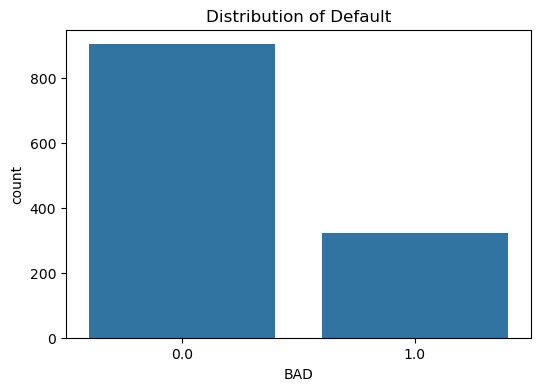

In [21]:
#EDA
plt.figure(figsize=(6, 4))
sns.countplot(x='BAD', data=df)
plt.title('Distribution of Default')
plt.show() 

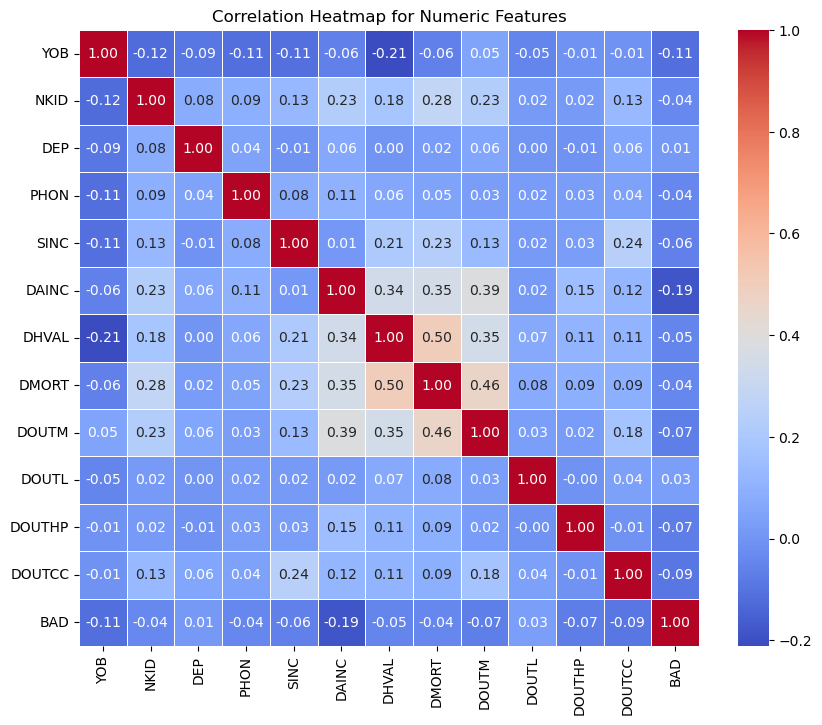

In [22]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [26]:
# Define features and target variable
X = df.drop('BAD', axis=1)  # Replace 'target' with your actual target column name
y = df['BAD']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
df.head(5)

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Assuming categorical columns are of type 'object'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure the target variable ('BAD') is not included in numerical_columns
if 'BAD' in numerical_columns:
    numerical_columns.remove('BAD')

# Print numerical columns to verify 'BAD' is removed
print("Numerical Columns (before scaling):", numerical_columns)

# Initialize dictionaries to store encoders
label_encoders = {}

# Encoding categorical columns using Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Ensure 'BAD' remains unchanged
df['BAD'] = df['BAD'].astype(int)  # Convert to integer if it's not already

# Standardizing numerical columns (excluding 'BAD')
scaler = StandardScaler()

# Explicitly confirm 'BAD' is NOT in numerical columns before scaling
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the processed dataset
df.to_csv("processed_data.csv", index=False)

# Display first few rows to verify
print(df.head())



Numerical Columns (before scaling): ['YOB', 'NKID', 'DEP', 'PHON', 'SINC', 'AES', 'DAINC', 'RES', 'DHVAL', 'DMORT', 'DOUTM', 'DOUTL', 'DOUTHP', 'DOUTCC']
        YOB      NKID       DEP      PHON      SINC       AES     DAINC  \
0 -2.094564  3.324471 -0.174534  0.326488 -0.414568  0.084501 -1.336978   
1 -0.656239  1.355188 -0.174534  0.326488 -0.414568 -0.350432  0.928638   
2  0.978221 -0.614095 -0.174534  0.326488 -0.414568 -0.785365  0.551035   
3 -0.002455  1.355188 -0.174534  0.326488 -0.414568 -0.350432 -1.307777   
4  0.912843 -0.614095 -0.174534  0.326488 -0.414568 -0.350432 -0.392972   

        RES     DHVAL     DMORT     DOUTM     DOUTL    DOUTHP    DOUTCC  BAD  
0 -0.179919 -0.059334 -0.594322 -0.799415 -0.145272 -0.240801 -0.234807    0  
1 -0.179919 -0.757138 -0.594534 -0.144933  0.645866 -0.240801  0.239609    0  
2 -1.113823 -0.757138 -0.594534 -0.799415 -0.145272 -0.240801 -0.234807    0  
3 -0.179919  0.445494 -0.146264  0.565648  0.235999 -0.240801  0.121005    0  


In [49]:
unique_values = df["BAD"].unique()
print(f"Unique values in column 'BAD':", unique_values)


Unique values in column 'BAD': [0 1]


In [51]:
df.shape

(1225, 15)

In [53]:
#training and testing data 
from sklearn.model_selection import train_test_split

# Define target variable
target_column = "BAD"

# Splitting features (X) and target variable (y)
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (980, 14) (980,)
Testing set shape: (245, 14) (245,)


In [ ]:
# training  set = 80 % of total rows(1225) = 980
# testing set=20% of total rows 1225 
# 15 columns out of which one is target which is removed during testing . 


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🎯 Random Forest Accuracy: 0.7183673469387755
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       180
           1       0.43      0.20      0.27        65

    accuracy                           0.72       245
   macro avg       0.60      0.55      0.55       245
weighted avg       0.67      0.72      0.68       245



In [62]:
import xgboost as xgb



xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7428571428571429
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       180
           1       0.56      0.15      0.24        65

    accuracy                           0.74       245
   macro avg       0.66      0.55      0.54       245
weighted avg       0.70      0.74      0.68       245



In [73]:
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
import catboost as cb


In [74]:
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 258, number of negative: 722
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263265 -> initscore=-1.029066
[LightGBM] [Info] Start training from score -1.029066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [75]:
cat_model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.7224489795918367
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       180
           1       0.36      0.06      0.11        65

    accuracy                           0.72       245
   macro avg       0.55      0.51      0.47       245
weighted avg       0.64      0.72      0.64       245



In [72]:
# Define Neural Network
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
print("🎯 Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4962 - loss: 0.7115 - val_accuracy: 0.7347 - val_loss: 0.5918
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7110 - loss: 0.6043 - val_accuracy: 0.7347 - val_loss: 0.5733
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7402 - loss: 0.5491 - val_accuracy: 0.7306 - val_loss: 0.5652
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5164 - val_accuracy: 0.7265 - val_loss: 0.5627
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 0.5283 - val_accuracy: 0.7388 - val_loss: 0.5625
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7403 - loss: 0.5322 - val_accuracy: 0.7388 - val_loss: 0.5652
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7542 - loss: 0.5262 - val_accuracy: 0.7265 - val_loss: 0.5636
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7717 - loss: 0.5073 - val_accuracy: 0.7347 - val_loss: 0.5670
Epo